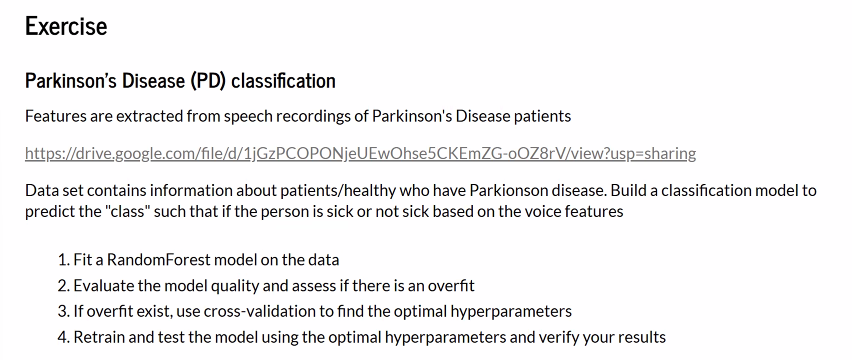

In [1]:
from IPython.display import Image
Image("Exc4Q.png")

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("pd_speech.csv")

In [4]:
data.head(2)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1


In [5]:
X= data.iloc[:, 1:-1]
y= data.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [7]:
clf_rt = RandomForestClassifier()
clf_rt.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = clf_rt.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.87      0.97      0.92       114

    accuracy                           0.88       152
   macro avg       0.88      0.78      0.81       152
weighted avg       0.88      0.88      0.87       152



In [10]:
y_predTest = clf_rt.predict(X_train)

In [11]:
print(classification_report(y_train, y_predTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       450

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604



In [19]:
from sklearn.model_selection import GridSearchCV
param = {
    'max_depth': [ 9, 10 ],
    'min_samples_split': [ 11, 12 ],
    'min_samples_leaf': [ 1, 2 ],
    'n_estimators': [61, 62, 63, 64]
}
grid_search = GridSearchCV(clf_rt, param, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [9, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [11, 12],
                         'n_estimators': [61, 62, 63, 64]},
             verbose=2)

In [20]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.87      0.97      0.92       114

    accuracy                           0.87       152
   macro avg       0.87      0.76      0.80       152
weighted avg       0.87      0.87      0.86       152



In [21]:
y_pred = best_model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       154
           1       0.98      1.00      0.99       450

    accuracy                           0.99       604
   macro avg       0.99      0.98      0.98       604
weighted avg       0.99      0.99      0.99       604

